# LifeWatch publication Statistics per publication type

This jupyter notebook contains statistics relating to types of publications of within the LifeWatch project.

(In the standardized data, this information is included in the columns 'DocType', 'LitStyles', 'ThesisDegree')

#### Import and load the data

In [107]:
# Load necessary libraries and functions
import sys
import os
import chardet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [159]:
# Select the data file
name_datafile = "TEST08122021.csv"

# Read data
location_standdata = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), "LW_publications_standardized", name_datafile)
data = pd.read_csv(location_standdata)
data.rename(columns={'SortDate': 'Year'}, inplace=True)
#data.columns

#### Number of publications for each publication type:

In [160]:
#Number of publications for each type:
pt = data[['BrefID', 'DocType', 'LitStyles', 'ThesisDegree']]

In [161]:
pt_summ = pt.groupby(['DocType', 'LitStyles'], dropna=False, as_index=True).nunique('BrefID').sort_values('BrefID')
pt_summ

,,BrefID,ThesisDegree
DocType,LitStyles,,
Book/Monograph,Final report,1,0
Journal,NaN,1,0
Reports,Annual report,1,0
NaN,NaN,1,0
Book/Monograph,Advice text,2,0
Reports,Final report,2,0
Book/Monograph,Conference,6,0
Ephemera,Poster,8,0
Data paper,NaN,9,0


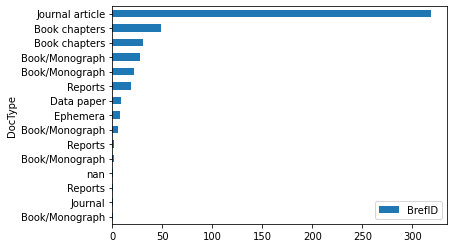

In [162]:
#graph of DocTypes:
pt_summ.reset_index(level=['DocType', 'LitStyles'], inplace=True) 
pt_summ.plot.barh(x='DocType', y='BrefID').legend(loc='lower right')

#### Number of theses:

In [163]:
dissertation_all = data.loc[data['LitStyles'] == 'Dissertation', ['BrefID','Year','stand_country','stand_flemish','ThesisDegree']]
#dissertation_all

In [164]:
dissertation_all_summ_year = dissertation_all.groupby(['ThesisDegree','Year'], dropna=False).nunique('BrefID')
dissertation_all_summ_year.T

ThesisDegree    BA            BSc  MSc                 PhD               
Year          2012 2014 2016 2015 2012 2013 2014 2015 2012 2013 2014 2015
BrefID           1    1    1    1    2    4    2    2    4    4    1    5
stand_country    0    0    0    0    0    1    1    0    1    1    0    1
stand_flemish    0    0    0    0    0    1    1    0    1    1    0    1

In [165]:
dissertation_all_summ = dissertation_all.groupby('ThesisDegree', dropna=False).nunique('BrefID')
dissertation_all_summ[['BrefID']].T

ThesisDegree,BA,BSc,MSc,PhD
BrefID,3,1,10,14


#### Number of Belgian theses:

In [166]:
# Number of Belgian Bachelor, Master and PhD theses:
dissertation_bel = dissertation_all.loc[dissertation_all['stand_country'] == 'Belgium']
dissertation_bel.T

,41,86,87,115,276,329,337,355
BrefID,222790,229063,229064,233208,245719,248760,249767,250881
Year,2012,2013,2013,2013,2014,2015,2015,2015
stand_country,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium
stand_flemish,o,x,x,x,x,x,x,x
ThesisDegree,PhD,PhD,PhD,MSc,MSc,PhD,PhD,PhD


In [167]:
dissertation_bel_summ_year = dissertation_bel.groupby(['ThesisDegree','Year'], dropna=False).nunique('BrefID')
dissertation_bel_summ_year[['BrefID']].T

ThesisDegree  MSc       PhD          
Year         2013 2014 2012 2013 2015
BrefID          1    1    1    2    3

In [168]:
dissertation_bel_summ = dissertation_bel.groupby('ThesisDegree', dropna=False).nunique('BrefID')
dissertation_bel_summ[['BrefID']].T

ThesisDegree,MSc,PhD
BrefID,2,6


#### Number of Flemish theses:

In [169]:
dissertation_flem = dissertation_bel.loc[dissertation_bel['stand_flemish'] == 'x']
dissertation_flem

,BrefID,Year,stand_country,stand_flemish,ThesisDegree
86,229063,2013,Belgium,x,PhD
87,229064,2013,Belgium,x,PhD
115,233208,2013,Belgium,x,MSc
276,245719,2014,Belgium,x,MSc
329,248760,2015,Belgium,x,PhD
337,249767,2015,Belgium,x,PhD
355,250881,2015,Belgium,x,PhD


In [170]:
dissertation_flem_summ_year = dissertation_flem.groupby(['ThesisDegree','Year'],dropna=False).nunique('BrefID')
dissertation_flem_summ_year[['BrefID']].T

ThesisDegree  MSc       PhD     
Year         2013 2014 2013 2015
BrefID          1    1    2    3

In [171]:
dissertation_flem_summ = dissertation_flem.groupby('ThesisDegree',dropna=False).nunique('BrefID')
dissertation_flem_summ[['BrefID']].T

ThesisDegree,MSc,PhD
BrefID,2,5
